## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [641]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import sqlite3
import seaborn as sns
%matplotlib inline

# A. DATA

# 1. bom_movie dataframe

In [2]:
bom_movie = pd.read_csv('zippedData/bom.movie_gross.csv')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [359]:
bom_movie['title_year'] = bom_movie.title + bom_movie['year'].astype(str)
bom_movie

,title,studio,domestic_gross,foreign_gross,year,title_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 32010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010)2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 12010
3,Inception,WB,292600000.0,535700000,2010,Inception2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Quake2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,Edward II (2018 re-release)2018
3384,El Pacto,Sony,2500.0,NaN,2018,El Pacto2018
3385,The Swan,Synergetic,2400.0,NaN,2018,The Swan2018


# 2. tmdb_movie dataframe

In [7]:
tmdb_movie = pd.read_csv('zippedData/tmdb.movies.csv')
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [348]:
tmdb_movie[tmdb_movie.original_title =="Avatar"]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676


In [387]:
tmdb_movie['release_month'] = tmdb_movie['release_date'].map(lambda x: pd.to_datetime(x).month)
tmdb_movie['release_year'] = tmdb_movie['release_date'].map(lambda x: x[:4])
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,2010


In [390]:
tmdb_movie['title_year'] = tmdb_movie['title'] + tmdb_movie['release_year'].astype(str)
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,release_year,title_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,2010,Harry Potter and the Deathly Hallows: Part 12010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,2010,How to Train Your Dragon2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,2010,Iron Man 22010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,1995,Toy Story1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,2010,Inception2010


In [746]:
merge_df = pd.merge(tmdb_movie,tn_movie, left_on = "title_year",right_on = 'movie_year',how="left")

In [747]:
merge_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,release_month_y,release_year_y,movie_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,277289760.0,52581232.0,112289760.0,329870992.0,0.318674,0.680544,1.999218,3.0,2010,How to Train Your Dragon2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,308723058.0,142433331.0,138723058.0,451156389.0,0.837843,0.816018,2.653861,5.0,2010,Iron Man 22010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,172749283.0,161796233.0,142749283.0,334545516.0,5.393208,4.758309,11.151517,11.0,1995,Toy Story1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,542948447.0,132576195.0,382948447.0,675524642.0,0.828601,2.393428,4.222029,7.0,2010,Inception2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. tn_movie dataframe

In [8]:
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv')
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [357]:
tn_movie['release_month'] = tn_movie['release_date'].map(lambda x: pd.to_datetime(x).month)
tn_movie['release_year'] = tn_movie['release_date'].map(lambda x: x[-4:])
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696,12,2017


In [361]:
tn_movie['movie_year'] = tn_movie['movie'] + tn_movie['release_year'].astype(str)

In [362]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,release_month,release_year,movie_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,12,2009,Avatar2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,5,2011,Pirates of the Caribbean: On Stranger Tides2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,6,2019,Dark Phoenix2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,5,2015,Avengers: Age of Ultron2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696,12,2017,Star Wars Ep. VIII: The Last Jedi2017


In [363]:
tn_movie[tn_movie['movie'] =="Coco"]        

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,release_month,release_year,movie_year
101,2,"Nov 22, 2017",Coco,175000000.0,209726015.0,798008101.0,588282086.0,34726015.0,413282086.0,623008101.0,0.198434,2.361612,3.560046,11,2017,Coco2017


In [9]:
tn_movie.shape

(5782, 6)

In [364]:
# turn production_budget column in numeric values:
tn_movie["production_budget"] = [str(i).replace("$", "") for i in tn_movie["production_budget"]]
tn_movie["production_budget"] = [float(str(i).replace(",", "")) for i in tn_movie["production_budget"]]

In [365]:
tn_movie["domestic_gross"] = [str(i).replace("$", "") for i in tn_movie["domestic_gross"]]
tn_movie["domestic_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["domestic_gross"]]


In [366]:
tn_movie["worldwide_gross"] = [str(i).replace("$", "") for i in tn_movie["worldwide_gross"]]
tn_movie["worldwide_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["worldwide_gross"]]

In [367]:
tn_movie['international_gross'] = tn_movie.worldwide_gross - tn_movie.domestic_gross
tn_movie['domestic_profit'] = tn_movie.domestic_gross - tn_movie.production_budget
tn_movie['international_profit'] = tn_movie.international_gross - tn_movie.production_budget
tn_movie['worldwide_profit'] = tn_movie.worldwide_gross - tn_movie.production_budget
tn_movie['domestic_ROI'] = (tn_movie.domestic_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['international_ROI'] = (tn_movie.international_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['worldwide_ROI'] = (tn_movie.worldwide_gross - tn_movie.production_budget)/tn_movie.production_budget

In [368]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,release_month,release_year,movie_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,12,2009,Avatar2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,5,2011,Pirates of the Caribbean: On Stranger Tides2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,6,2019,Dark Phoenix2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,5,2015,Avengers: Age of Ultron2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696,12,2017,Star Wars Ep. VIII: The Last Jedi2017


# 4. rt_movie dateframe

In [369]:
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
rt_movie.head()

,,,,,,,,,,,<<<<<<< HEAD
id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a singer, and when against her mother's bidding she sings a sultry version of ""Hey There (You With the Stars in Your Eyes)"" (instead of Mom's choice, ""You'll Never Walk Alone"") at a talent contest, she wins a recording contact and moves to New York City. She cuts a record and gains a new stage name, Denise Waverly; however, she soon finds that girl singers are a dime a dozen in the Big Apple and her career as a vocalist goes nowhere. But she has a knack for writing songs, and eccentric producer Joel Milner (John Turturro) asks her to pen some songs for his upcoming projects. 

# 5. rt_reviews dataframe

In [16]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t',encoding='latin-1')
rt_reviews.head()

/var/folders/xf/z2fcddts049dxg763n_0c6qw0000gn/T/ipykernel_4346/1384396749.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t',encoding='latin-1')


<<<<<<< HEAD
id review                                             rating fresh  critic         top_critic publisher                      date
3  A distinctly gallows take on contemporary finan... 3/5    fresh  PJ Nabarro     0          Patrick Nabarro   November 10, 2018
   It's an allegory in search of a meaning that ne... NaN    rotten Annalee Newitz 0          io9.com                May 23, 2018
   ... life lived in a bubble in financial dealing... NaN    fresh  Sean Axmaker   0          Stream on Demand    January 4, 2018
   Continuing along a line introduced in last year... NaN    fresh  Daniel Kasman  0          MUBI              November 16, 2017

# 6. db sql file

In [370]:
con = sqlite3.connect('zippedData/im.db')
cursor_obj = con.cursor()

In [371]:
%%bash 

sqlite3 zippedData/im.db
.tables

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


# 6.1. director

In [372]:
im_query =  \
"""
SELECT *
FROM directors
"""

In [373]:
directors_df = pd.read_sql("""
SELECT *
FROM directors
""", con)

In [21]:
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [22]:
directors_df.shape

(291174, 2)

In [23]:
directors_df['diretor_id'] = directors_df['person_id'].copy()
directors_df.head()

,movie_id,person_id,diretor_id
0,tt0285252,nm0899854,nm0899854
1,tt0462036,nm1940585,nm1940585
2,tt0835418,nm0151540,nm0151540
3,tt0835418,nm0151540,nm0151540
4,tt0878654,nm0089502,nm0089502


In [24]:
directors_df.diretor_id.nunique()

109253

In [25]:
#Remove dubplicate:
directors_df = directors_df.drop_duplicates(keep="first")
directors_df.head()

,movie_id,person_id,diretor_id
0,tt0285252,nm0899854,nm0899854
1,tt0462036,nm1940585,nm1940585
2,tt0835418,nm0151540,nm0151540
4,tt0878654,nm0089502,nm0089502
5,tt0878654,nm2291498,nm2291498


In [26]:
directors_df.shape

(163535, 3)

# 6.2. movie_akas

In [27]:
movie_akas_df = pd.read_sql("""
SELECT *
FROM movie_akas
""", con)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


# 6.3. movie_ratings

In [28]:
movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
""", con)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# 6.4. principals

In [29]:
principals_df = pd.read_sql("""
SELECT *
FROM principals
""", con)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


# 6.5. known_for

In [30]:
known_for_df = pd.read_sql("""
SELECT *
FROM known_for
""", con)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


# 6.6. movie_basics

In [31]:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [376]:
movie_basics_df['title_year'] = movie_basics_df['primary_title'] + movie_basics_df['start_year'].astype(str)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera2017


In [377]:
movie_basics_df[movie_basics_df.primary_title == "Avatar"]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror,Avatar2011


# 6.7. persons

In [33]:
persons_df = pd.read_sql("""
SELECT *
FROM persons
""", con)
persons_df.head()


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


# 6.8. writers

In [34]:
writers_df = pd.read_sql("""
SELECT *
FROM writers
""", con)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


# 7. Genrelookup from https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

In [35]:
genre_lookup_df = pd.read_csv('zippedData/genrelookup-internet.csv')
genre_lookup_df.head()

,Genre type,Genre code
0,Action,28
1,Adventure,12
2,Animation,16
3,Comedy,35
4,Crime,80


In [415]:
a = list (genre_lookup_df['Genre code'])
b = list (genre_lookup_df['Genre type'])
genre_dict = dict((zip(a, b)))
genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

# B-WORKING DATA

In [644]:
#Merge "tn_movie" dataframe with "movie_basics":

tnmovie_basics = pd.merge(tn_movie,movie_basics_df, left_on = "movie_year",right_on ="title_year", how = "left" )

tnmovie_basics.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,...,release_month,release_year,movie_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,...,12,2009,Avatar2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,5,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,...,6,2019,Dark Phoenix2019,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,...,5,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,...,12,2017,Star Wars Ep. VIII: The Last Jedi2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [645]:
tnmovie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5845 non-null   int64  
 1   release_date          5845 non-null   object 
 2   movie                 5845 non-null   object 
 3   production_budget     5845 non-null   float64
 4   domestic_gross        5845 non-null   float64
 5   worldwide_gross       5845 non-null   float64
 6   international_gross   5845 non-null   float64
 7   domestic_profit       5845 non-null   float64
 8   international_profit  5845 non-null   float64
 9   worldwide_profit      5845 non-null   float64
 10  domestic_ROI          5845 non-null   float64
 11  international_ROI     5845 non-null   float64
 12  worldwide_ROI         5845 non-null   float64
 13  release_month         5845 non-null   int64  
 14  release_year          5845 non-null   object 
 15  movie_year           

In [715]:
#Combine "tnmovie_basics" with "directors_df" & "persons_df" to get director name in column "primary_name"
tnmovie_basics_directorid = pd.merge(tnmovie_basics,directors_df, left_on ='movie_id', right_on = "movie_id", how = "left")
tnmovie_basics_director = pd.merge(tnmovie_basics_directorid,persons_df, left_on ='person_id', right_on = "person_id", how = "left")
tnmovie_basics_director.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,...,original_title,start_year,runtime_minutes,genres,title_year,person_id,primary_name,birth_year,death_year,primary_profession
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer"
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer"
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer"
4,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer"


In [717]:
tnmovie_basics_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8990 non-null   int64  
 1   release_date          8990 non-null   object 
 2   movie                 8990 non-null   object 
 3   production_budget     8990 non-null   float64
 4   domestic_gross        8990 non-null   float64
 5   worldwide_gross       8990 non-null   float64
 6   international_gross   8990 non-null   float64
 7   domestic_profit       8990 non-null   float64
 8   international_profit  8990 non-null   float64
 9   worldwide_profit      8990 non-null   float64
 10  domestic_ROI          8990 non-null   float64
 11  international_ROI     8990 non-null   float64
 12  worldwide_ROI         8990 non-null   float64
 13  release_month         8990 non-null   int64  
 14  release_year          8990 non-null   object 
 15  movie_year           

In [718]:
#Combine 'tnmovie_basics_director' with 'bom_movie' & 'tmdb_movie' to get studio & popularity:
tnmovie_basics_director_studio = pd.merge(tnmovie_basics_director,bom_movie, left_on='movie_year', right_on = 'title_year', how = 'left')
tnmovie_basics_director_studio_popularity = pd.merge(tnmovie_basics_director_studio,tmdb_movie, left_on='movie_year', right_on = 'title_year', how = 'left')
tnmovie_basics_director_studio_popularity.head()                                                    

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,...,original_language,original_title_y,popularity,release_date_y,title_y,vote_average,vote_count,release_month_y,release_year_y,title_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,...,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0,12.0,2009,Avatar2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0,5.0,2011,Pirates of the Caribbean: On Stranger Tides2011
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0,5.0,2011,Pirates of the Caribbean: On Stranger Tides2011
3,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0,5.0,2011,Pirates of the Caribbean: On Stranger Tides2011
4,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,...,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0,5.0,2011,Pirates of the Caribbean: On Stranger Tides2011


In [719]:
tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9402 entries, 0 to 9401
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  9402 non-null   int64  
 1   release_date_x        9402 non-null   object 
 2   movie                 9402 non-null   object 
 3   production_budget     9402 non-null   float64
 4   domestic_gross_x      9402 non-null   float64
 5   worldwide_gross       9402 non-null   float64
 6   international_gross   9402 non-null   float64
 7   domestic_profit       9402 non-null   float64
 8   international_profit  9402 non-null   float64
 9   worldwide_profit      9402 non-null   float64
 10  domestic_ROI          9402 non-null   float64
 11  international_ROI     9402 non-null   float64
 12  worldwide_ROI         9402 non-null   float64
 13  release_month_x       9402 non-null   int64  
 14  release_year_x        9402 non-null   object 
 15  movie_year           

In [720]:
tnmovie_basics_director_studio_popularity.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross_x', 'worldwide_gross', 'international_gross',
       'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'release_month_x',
       'release_year_x', 'movie_year', 'movie_id', 'primary_title',
       'original_title_x', 'start_year', 'runtime_minutes', 'genres',
       'title_year_x', 'person_id', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'title_x', 'studio', 'domestic_gross_y',
       'foreign_gross', 'year', 'title_year_y', 'Unnamed: 0', 'genre_ids',
       'id_y', 'original_language', 'original_title_y', 'popularity',
       'release_date_y', 'title_y', 'vote_average', 'vote_count',
       'release_month_y', 'release_year_y', 'title_year'],
      dtype='object')

In [721]:
drop_tnmovie_basics_director_studio_popularity = tnmovie_basics_director_studio_popularity.drop(columns = ['id_x','release_month_x',
       'release_year_x', 'movie_year', 'movie_id', 'primary_title',
       'original_title_x', 'start_year',
       'title_year_x', 'person_id', 'birth_year', 'death_year',
       'primary_profession', 'title_x', 'studio', 'domestic_gross_y',
       'foreign_gross', 'year', 'title_year_y', 'Unnamed: 0',
       'id_y', 'original_language', 'original_title_y',
       'release_date_y', 'title_y', 'vote_average', 'vote_count',
       'release_month_y', 'release_year_y', 'title_year', "genre_ids",'runtime_minutes'])
drop_tnmovie_basics_director_studio_popularity.head(10)

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,genres,primary_name,popularity
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577,NaN,NaN,26.526
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,30.579
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,30.579
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,30.579
4,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,30.579
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,30.579
6,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,"Action,Adventure,Sci-Fi",Simon Kinberg,NaN
7,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,"Action,Adventure,Sci-Fi",Simon Kinberg,NaN
8,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,"Action,Adventure,Sci-Fi",Simon Kinberg,NaN
9,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108,"Action,Adventure,Sci-Fi",Simon Kinberg,NaN


In [687]:
# drop_tnmovie_basics_director_studio_popularity['genre_names'] = drop_tnmovie_basics_director_studio_popularity['genre_ids'].map(genre_dict)

In [722]:
drop_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9402 entries, 0 to 9401
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        9402 non-null   object 
 1   movie                 9402 non-null   object 
 2   production_budget     9402 non-null   float64
 3   domestic_gross_x      9402 non-null   float64
 4   worldwide_gross       9402 non-null   float64
 5   international_gross   9402 non-null   float64
 6   domestic_profit       9402 non-null   float64
 7   international_profit  9402 non-null   float64
 8   worldwide_profit      9402 non-null   float64
 9   domestic_ROI          9402 non-null   float64
 10  international_ROI     9402 non-null   float64
 11  worldwide_ROI         9402 non-null   float64
 12  genres                5056 non-null   object 
 13  primary_name          5056 non-null   object 
 14  popularity            5048 non-null   float64
dtypes: float64(11), objec

In [723]:
drop_tnmovie_basics_director_studio_popularity = drop_tnmovie_basics_director_studio_popularity.drop_duplicates(keep = "first")
drop_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6021 entries, 0 to 9401
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        6021 non-null   object 
 1   movie                 6021 non-null   object 
 2   production_budget     6021 non-null   float64
 3   domestic_gross_x      6021 non-null   float64
 4   worldwide_gross       6021 non-null   float64
 5   international_gross   6021 non-null   float64
 6   domestic_profit       6021 non-null   float64
 7   international_profit  6021 non-null   float64
 8   worldwide_profit      6021 non-null   float64
 9   domestic_ROI          6021 non-null   float64
 10  international_ROI     6021 non-null   float64
 11  worldwide_ROI         6021 non-null   float64
 12  genres                1716 non-null   object 
 13  primary_name          1717 non-null   object 
 14  popularity            1827 non-null   float64
dtypes: float64(11), object(4)


In [724]:
drop_tnmovie_basics_director_studio_popularity.isna().sum()

release_date_x             0
movie                      0
production_budget          0
domestic_gross_x           0
worldwide_gross            0
international_gross        0
domestic_profit            0
international_profit       0
worldwide_profit           0
domestic_ROI               0
international_ROI          0
worldwide_ROI              0
genres                  4305
primary_name            4304
popularity              4194
dtype: int64

In [725]:
dropna_tnmovie_basics_director_studio_popularity = drop_tnmovie_basics_director_studio_popularity.dropna(axis ="index")
dropna_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 1 to 9363
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        1577 non-null   object 
 1   movie                 1577 non-null   object 
 2   production_budget     1577 non-null   float64
 3   domestic_gross_x      1577 non-null   float64
 4   worldwide_gross       1577 non-null   float64
 5   international_gross   1577 non-null   float64
 6   domestic_profit       1577 non-null   float64
 7   international_profit  1577 non-null   float64
 8   worldwide_profit      1577 non-null   float64
 9   domestic_ROI          1577 non-null   float64
 10  international_ROI     1577 non-null   float64
 11  worldwide_ROI         1577 non-null   float64
 12  genres                1577 non-null   object 
 13  primary_name          1577 non-null   object 
 14  popularity            1577 non-null   float64
dtypes: float64(11), object(4)


In [726]:
dropna_tnmovie_basics_director_studio_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 1 to 9363
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        1577 non-null   object 
 1   movie                 1577 non-null   object 
 2   production_budget     1577 non-null   float64
 3   domestic_gross_x      1577 non-null   float64
 4   worldwide_gross       1577 non-null   float64
 5   international_gross   1577 non-null   float64
 6   domestic_profit       1577 non-null   float64
 7   international_profit  1577 non-null   float64
 8   worldwide_profit      1577 non-null   float64
 9   domestic_ROI          1577 non-null   float64
 10  international_ROI     1577 non-null   float64
 11  worldwide_ROI         1577 non-null   float64
 12  genres                1577 non-null   object 
 13  primary_name          1577 non-null   object 
 14  popularity            1577 non-null   float64
dtypes: float64(11), object(4)


In [727]:
#Sort string in "genres" columns in anphabet order:
dropna_tnmovie_basics_director_studio_popularity.loc[:, 'genres'] = dropna_tnmovie_basics_director_studio_popularity['genres'].apply(lambda x: ', '.join(sorted(x.split(', '))))
dropna_tnmovie_basics_director_studio_popularity.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 1 to 9363
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        1577 non-null   object 
 1   movie                 1577 non-null   object 
 2   production_budget     1577 non-null   float64
 3   domestic_gross_x      1577 non-null   float64
 4   worldwide_gross       1577 non-null   float64
 5   international_gross   1577 non-null   float64
 6   domestic_profit       1577 non-null   float64
 7   international_profit  1577 non-null   float64
 8   worldwide_profit      1577 non-null   float64
 9   domestic_ROI          1577 non-null   float64
 10  international_ROI     1577 non-null   float64
 11  worldwide_ROI         1577 non-null   float64
 12  genres                1577 non-null   object 
 13  primary_name          1577 non-null   object 
 14  popularity            1577 non-null   float64
dtypes: float64(11), object(4)


In [729]:
#Copy "genres" column and create a new column called "each_genre"
dropna_tnmovie_basics_director_studio_popularity.loc[:, 'each_genre'] = dropna_tnmovie_basics_director_studio_popularity['genres'].copy()
# dropna_tnmovie_basics_director_studio_popularity.info()

In [730]:
dropna_tnmovie_basics_director_studio_popularity.columns

Index(['release_date_x', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'international_gross', 'domestic_profit',
       'international_profit', 'worldwide_profit', 'domestic_ROI',
       'international_ROI', 'worldwide_ROI', 'genres', 'primary_name',
       'popularity', 'each_genre'],
      dtype='object')

In [731]:
#Split "each_genre" row into multiple rows:
split_dropna_tnmovie_basics_director_studio_popularity = dropna_tnmovie_basics_director_studio_popularity.set_index(['release_date_x', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'international_gross', 'domestic_profit',
       'international_profit', 'worldwide_profit', 'domestic_ROI',
       'international_ROI', 'worldwide_ROI', 'genres', 'primary_name',
       'popularity', 'each_genre']).apply(lambda x: x.str.split(',').explode()).reset_index()
# split_row_dropna_subset_tnmovie_basics_director_studio_popularity.head()

In [732]:
#Split "genres" column into multiple columns:
split_dropna_tnmovie_basics_director_studio_popularity[['main_genre','sub_genre1','sub_genre2']] = split_dropna_tnmovie_basics_director_studio_popularity.genres.str.split(",",expand=True)
split_dropna_tnmovie_basics_director_studio_popularity.head()


,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,genres,primary_name,popularity,each_genre,main_genre,sub_genre1,sub_genre2
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,30.579,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
1,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,"Action,Adventure,Sci-Fi",Joss Whedon,44.383,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
2,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,5.827114,"Action,Adventure,Sci-Fi",Anthony Russo,80.773,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
3,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,5.827114,"Action,Adventure,Sci-Fi",Joe Russo,80.773,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
4,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,-70975705.0,1.269209e+08,3.559452e+08,-0.236586,0.423070,1.186484,"Action,Adventure,Fantasy",Zack Snyder,34.953,"Action,Adventure,Fantasy",Action,Adventure,Fantasy


In [733]:
combined_data = split_dropna_tnmovie_basics_director_studio_popularity
combined_data.head()

,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,genres,primary_name,popularity,each_genre,main_genre,sub_genre1,sub_genre2
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,30.579,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
1,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841,"Action,Adventure,Sci-Fi",Joss Whedon,44.383,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
2,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,5.827114,"Action,Adventure,Sci-Fi",Anthony Russo,80.773,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
3,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,378815482.0,1.069319e+09,1.748134e+09,1.262718,3.564396,5.827114,"Action,Adventure,Sci-Fi",Joe Russo,80.773,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
4,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,-70975705.0,1.269209e+08,3.559452e+08,-0.236586,0.423070,1.186484,"Action,Adventure,Fantasy",Zack Snyder,34.953,"Action,Adventure,Fantasy",Action,Adventure,Fantasy


In [734]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        1577 non-null   object 
 1   movie                 1577 non-null   object 
 2   production_budget     1577 non-null   float64
 3   domestic_gross_x      1577 non-null   float64
 4   worldwide_gross       1577 non-null   float64
 5   international_gross   1577 non-null   float64
 6   domestic_profit       1577 non-null   float64
 7   international_profit  1577 non-null   float64
 8   worldwide_profit      1577 non-null   float64
 9   domestic_ROI          1577 non-null   float64
 10  international_ROI     1577 non-null   float64
 11  worldwide_ROI         1577 non-null   float64
 12  genres                1577 non-null   object 
 13  primary_name          1577 non-null   object 
 14  popularity            1577 non-null   float64
 15  each_genre           

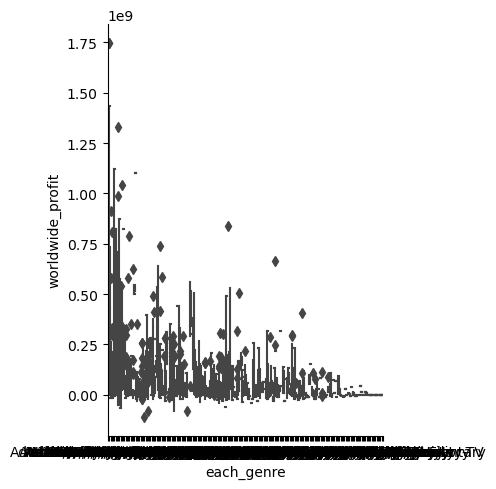

In [738]:

sns.catplot(x = 'each_genre', y = 'worldwide_profit', kind = 'box', data = combined_data)

plt.show()

In [739]:
# sort worldwide_profit by each_genre:
mean_profit = combined_data.groupby('each_genre').mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
mean_profit

,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,popularity
each_genre,,,,,,,,,,,
"Family,Fantasy,Musical",1.600000e+08,5.040142e+08,1.259200e+09,7.551855e+08,3.440142e+08,5.951855e+08,1.099200e+09,2.150089,3.719910,6.869998,31.793000
"Fantasy,Musical",2.000000e+08,3.341911e+08,1.025491e+09,6.913000e+08,1.341911e+08,4.913000e+08,8.254911e+08,0.670956,2.456500,4.127456,11.310000
"Adventure,Drama,Sci-Fi",1.365000e+08,2.082258e+08,6.608254e+08,4.525996e+08,7.172578e+07,3.160996e+08,5.243254e+08,0.627314,2.425681,4.052996,25.648000
"Action,Adventure,Sci-Fi",1.737434e+08,2.522837e+08,6.908608e+08,4.385770e+08,7.854035e+07,2.648336e+08,5.171174e+08,0.423308,1.380248,2.803556,26.895302
"Adventure,Fantasy",2.316667e+08,1.928914e+08,7.012107e+08,5.083193e+08,-3.877525e+07,2.766526e+08,4.695440e+08,-0.203919,1.083106,1.879187,29.277000
...,...,...,...,...,...,...,...,...,...,...,...
"Action,Fantasy,Western",4.200000e+07,5.666340e+06,8.514325e+06,2.847985e+06,-3.633366e+07,-3.915202e+07,-3.348568e+07,-0.865087,-0.932191,-0.797278,8.259000
"Crime,Drama,History",5.000000e+07,1.224330e+06,8.004221e+06,6.779891e+06,-4.877567e+07,-4.322011e+07,-4.199578e+07,-0.975513,-0.864402,-0.839916,26.386000
"Comedy,Western",6.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+07,-6.000000e+07,-6.000000e+07,-1.000000,-1.000000,-1.000000,10.187000


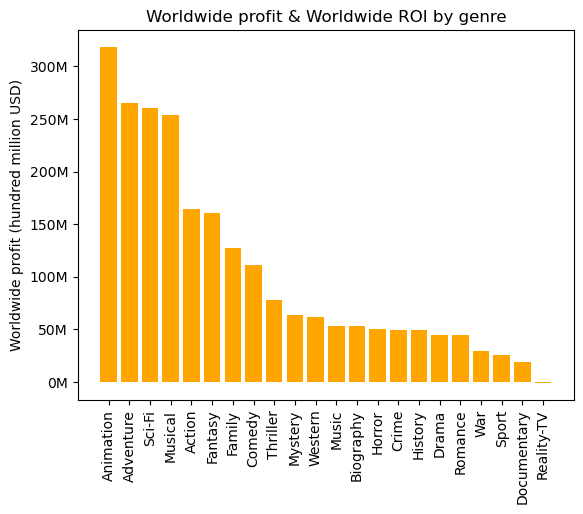

In [659]:

x = mean_profit.index
y1 = mean_profit['worldwide_profit']
y2 = mean_profit['worldwide_ROI']

fig, ax1 = plt.subplots()

# Bar chart
ax1.bar(x, y1, color='orange')
ax1.set_ylabel('Worldwide profit (hundred million USD)')
#create y-axis on the right:
# ax2 = ax1.twinx()
# Line chart
# ax2.plot(x, y2, marker='o', color='black') 
# ax2.set_ylabel('Worldwide ROI')
#format a-axis tick
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)
# ax1.set_xticklabels(x, rotation=90)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

ax1.set_title('Worldwide profit & Worldwide ROI by genre');

# Focus on top 5 genres

In [743]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        1577 non-null   object 
 1   movie                 1577 non-null   object 
 2   production_budget     1577 non-null   float64
 3   domestic_gross_x      1577 non-null   float64
 4   worldwide_gross       1577 non-null   float64
 5   international_gross   1577 non-null   float64
 6   domestic_profit       1577 non-null   float64
 7   international_profit  1577 non-null   float64
 8   worldwide_profit      1577 non-null   float64
 9   domestic_ROI          1577 non-null   float64
 10  international_ROI     1577 non-null   float64
 11  worldwide_ROI         1577 non-null   float64
 12  genres                1577 non-null   object 
 13  primary_name          1577 non-null   object 
 14  popularity            1577 non-null   float64
 15  each_genre           

In [744]:
top5_genre = ['Animation','Adventure','Sci-Fi','Musical','Action']

In [745]:
data_top_5 = combined_data[combined_data['each_genre'].isin(top5_genre)]
data_top_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 901 to 1566
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   release_date_x        7 non-null      object 
 1   movie                 7 non-null      object 
 2   production_budget     7 non-null      float64
 3   domestic_gross_x      7 non-null      float64
 4   worldwide_gross       7 non-null      float64
 5   international_gross   7 non-null      float64
 6   domestic_profit       7 non-null      float64
 7   international_profit  7 non-null      float64
 8   worldwide_profit      7 non-null      float64
 9   domestic_ROI          7 non-null      float64
 10  international_ROI     7 non-null      float64
 11  worldwide_ROI         7 non-null      float64
 12  genres                7 non-null      object 
 13  primary_name          7 non-null      object 
 14  popularity            7 non-null      float64
 15  each_genre            7 non

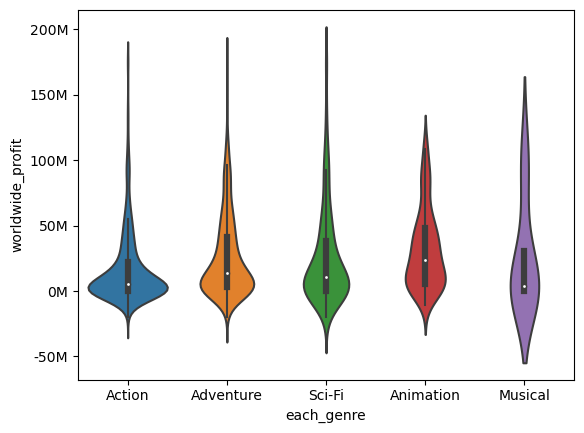

In [681]:
fig, ax = plt.subplots()
sns.violinplot(x = 'each_genre' , y = 'worldwide_profit', data = data_top_5)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/10000000,'1.0f')+'M'))
plt.show()

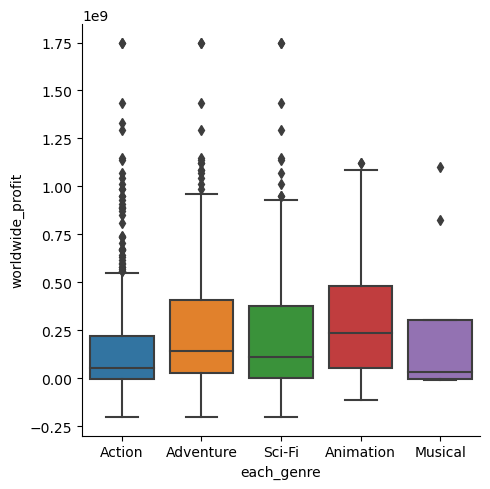

In [683]:
sns.catplot(x = 'each_genre', y = 'worldwide_profit', kind = 'box', data = data_top_5)
plt.show()

In [663]:
top_7_profit = mean_profit.head(5)
top_7_profit

,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,international_gross,worldwide_gross
each_genre,,,,,,,,,,
Animation,4.921948e+07,1.678123e+08,3.185020e+08,0.501064,1.539228,3.040292,1.014702e+08,1.506897e+08,2.692825e+08,4.199721e+08
Adventure,2.462441e+07,1.334398e+08,2.653213e+08,0.276487,1.010813,2.287300,1.072571e+08,1.318815e+08,2.406969e+08,3.725784e+08
Sci-Fi,3.411560e+07,1.315725e+08,2.608774e+08,0.513183,1.066083,2.579266,9.518938e+07,1.293050e+08,2.267618e+08,3.560668e+08
Musical,5.655182e+07,1.326151e+08,2.542670e+08,-0.030976,0.957519,1.926543,6.510000e+07,1.216518e+08,1.977151e+08,3.193670e+08
Action,9.349997e+06,7.606164e+07,1.646309e+08,0.064540,0.562125,1.626665,7.921930e+07,8.856929e+07,1.552809e+08,2.438502e+08


In [627]:
# sort by worldwide_profit
genre_combination = top_7_profit.groupby(['main_genre','sub_genre1','sub_genre2']).mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
genre_combination
genre_combination.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

KeyError: 'main_genre'

In [626]:
# sort by worldwide_profit to find directors:

genre_combination = split_dropna_tnmovie_basics_director_studio_popularity.groupby(['main_genre','sub_genre1','sub_genre2']).mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
genre_combination.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

KeyError: 'main_genre'

# Director working

In [549]:
top_7_genre= ['Animation', 'Adventure','Sci-Fi','Musical', 'Action', 'Fantasy', 'Family']


In [621]:
directors_by_7_genre = split_dropna_tnmovie_basics_director_studio_popularity[split_dropna_tnmovie_basics_director_studio_popularity['each_genre'].isin(top_7_genre)]
directors_by_7_genre

,release_date_x,movie,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,genres,primary_name,production_budget,domestic_gross_x,international_gross,worldwide_gross,each_genre,main_genre,sub_genre1,sub_genre2
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125.0,394000000.0,635063875.0,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,410600000.0,241063875.0,804600000.0,1.045664e+09,Action,Action,Adventure,Fantasy
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125.0,394000000.0,635063875.0,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,410600000.0,241063875.0,804600000.0,1.045664e+09,Adventure,Action,Adventure,Fantasy
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,-169536125.0,394000000.0,635063875.0,-0.412899,0.959571,1.546673,"Action,Adventure,Fantasy",Rob Marshall,410600000.0,241063875.0,804600000.0,1.045664e+09,Fantasy,Action,Adventure,Fantasy
3,"Jun 7, 2019",Dark Phoenix,-307237650.0,-243000000.0,-200237650.0,-0.877822,-0.694286,-0.572108,"Action,Adventure,Sci-Fi",Simon Kinberg,350000000.0,42762350.0,107000000.0,1.497624e+08,Action,Action,Adventure,Sci-Fi
4,"Jun 7, 2019",Dark Phoenix,-307237650.0,-243000000.0,-200237650.0,-0.877822,-0.694286,-0.572108,"Action,Adventure,Sci-Fi",Simon Kinberg,350000000.0,42762350.0,107000000.0,1.497624e+08,Adventure,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,"Sep 4, 2015",Heroes of Dirt,-175000.0,-175000.0,-175000.0,-1.000000,-1.000000,-1.000000,"Action,Drama,Sport",Eric Bugbee,175000.0,0.0,0.0,0.000000e+00,Action,Action,Drama,Sport
4194,"Jul 7, 2017",A Ghost Story,1494798.0,1074984.0,2669782.0,14.947980,10.749840,26.697820,"Drama,Fantasy,Romance",David Lowery,100000.0,1594798.0,1174984.0,2.769782e+06,Fantasy,Drama,Fantasy,Romance
4204,"Sep 29, 2015",Queen Crab,-75000.0,-75000.0,-75000.0,-1.000000,-1.000000,-1.000000,"Action,Sci-Fi,Thriller",Brett Piper,75000.0,0.0,0.0,0.000000e+00,Action,Action,Sci-Fi,Thriller
4205,"Sep 29, 2015",Queen Crab,-75000.0,-75000.0,-75000.0,-1.000000,-1.000000,-1.000000,"Action,Sci-Fi,Thriller",Brett Piper,75000.0,0.0,0.0,0.000000e+00,Sci-Fi,Action,Sci-Fi,Thriller


In [628]:
mean_directors_by_7_genre = directors_by_7_genre.groupby(['primary_name']).mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
mean_directors_by_7_genre
# .style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
# 'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,production_budget,domestic_gross_x,international_gross,worldwide_gross
primary_name,,,,,,,,,,
Colin Trevorrow,437270625.0,781584239.0,1.433855e+09,2.033817,3.635276,6.669092,215000000.0,652270625.0,996584239.0,1.648855e+09
Joss Whedon,263342707.5,641532222.5,1.182675e+09,1.079267,2.415845,4.495112,277800000.0,541142707.5,919332222.5,1.460475e+09
Ryan Coogler,500059566.0,448198658.0,1.148258e+09,2.500298,2.240993,5.741291,200000000.0,700059566.0,648198658.0,1.348258e+09
J.A. Bayona,247719760.0,718053039.0,1.135773e+09,1.457175,4.223841,6.681016,170000000.0,417719760.0,888053039.0,1.305773e+09
Chris Buck,250738009.0,721731901.0,1.122470e+09,1.671587,4.811546,7.483133,150000000.0,400738009.0,871731901.0,1.272470e+09
...,...,...,...,...,...,...,...,...,...,...
Robert Schwentke,-96381145.0,-84542177.0,-5.092332e+07,-0.741393,-0.650324,-0.391718,130000000.0,33618855.0,45457823.0,7.907668e+07
Xiao Feng,-65000000.0,-64483721.0,-6.448372e+07,-1.000000,-0.992057,-0.992057,65000000.0,0.0,516279.0,5.162790e+05
Andrey Konchalovskiy,-89804541.0,-69729443.0,-6.953398e+07,-0.997828,-0.774772,-0.772600,90000000.0,195459.0,20270557.0,2.046602e+07


In [580]:
mean_directors_by_7_genre.describe()

,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI
count,5.930000e+02,5.930000e+02,5.930000e+02,5.930000e+02,5.930000e+02,5.930000e+02,5.930000e+02,593.000000,593.000000,593.000000
mean,6.399894e+07,7.684257e+07,2.052441e+08,1.284016e+08,1.284363e+07,6.440264e+07,1.412452e+08,0.236012,0.564535,1.800547
std,6.168261e+07,1.024446e+08,2.801870e+08,1.844259e+08,7.176334e+07,1.412226e+08,2.351297e+08,1.608030,2.018090,3.128042
min,7.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-3.072376e+08,-2.430000e+08,-2.002376e+08,-1.000000,-1.000000,-1.000000
25%,1.500000e+07,6.708137e+06,1.655328e+07,4.378725e+06,-1.679130e+07,-7.883389e+06,-4.981780e+05,-0.712175,-0.709844,-0.152000
50%,4.200000e+07,4.084800e+07,9.112660e+07,4.700000e+07,-2.000000e+06,2.760202e+06,4.275801e+07,-0.131154,0.119597,1.191665
75%,1.000000e+08,1.002460e+08,2.780342e+08,1.701388e+08,2.014864e+07,7.659908e+07,1.754041e+08,0.512491,1.128642,2.658676
max,3.500000e+08,7.000596e+08,1.648855e+09,9.965842e+08,5.000596e+08,7.815842e+08,1.433855e+09,14.947980,28.711880,30.016276


In [577]:
#Take top 10 director:
top_10_director_7_genre = mean_directors_by_7_genre.head(10)
top_10_director_7_genre.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI
primary_name,,,,,,,,,,
Colin Trevorrow,"215,000,000.00","652,270,625.00","1,648,854,864.00","996,584,239.00","437,270,625.00","781,584,239.00","1,433,854,864.00",2.03,3.64,6.67
Joss Whedon,"277,800,000.00","541,142,707.50","1,460,474,930.00","919,332,222.50","263,342,707.50","641,532,222.50","1,182,674,930.00",1.08,2.42,4.50
Ryan Coogler,"200,000,000.00","700,059,566.00","1,348,258,224.00","648,198,658.00","500,059,566.00","448,198,658.00","1,148,258,224.00",2.50,2.24,5.74
J.A. Bayona,"170,000,000.00","417,719,760.00","1,305,772,799.00","888,053,039.00","247,719,760.00","718,053,039.00","1,135,772,799.00",1.46,4.22,6.68
Chris Buck,"150,000,000.00","400,738,009.00","1,272,469,910.00","871,731,901.00","250,738,009.00","721,731,901.00","1,122,469,910.00",1.67,4.81,7.48
Jennifer Lee,"150,000,000.00","400,738,009.00","1,272,469,910.00","871,731,901.00","250,738,009.00","721,731,901.00","1,122,469,910.00",1.67,4.81,7.48
Bill Condon,"160,000,000.00","504,014,165.00","1,259,199,706.00","755,185,541.00","344,014,165.00","595,185,541.00","1,099,199,706.00",2.15,3.72,6.87
James Wan,"167,500,000.00","339,548,110.25","1,239,851,678.50","900,303,568.25","172,048,110.25","732,803,568.25","1,072,351,678.50",1.04,4.34,6.37
Anthony Russo,"240,000,000.00","448,882,263.00","1,300,868,500.67","851,986,237.67","208,882,263.00","611,986,237.67","1,060,868,500.67",0.81,2.39,4.20


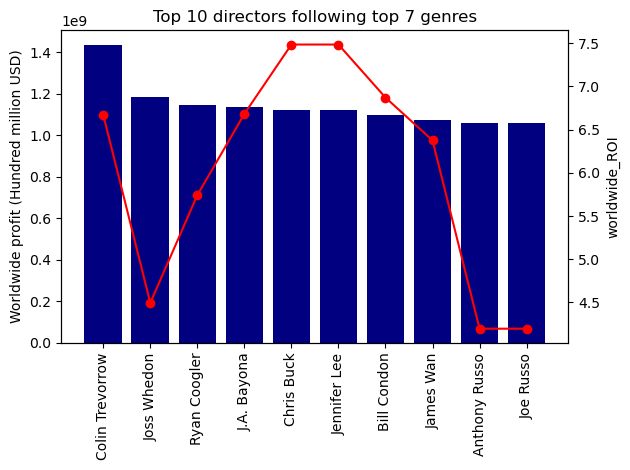

In [594]:
x_director = top_10_director_7_genre.index
y1_director = top_10_director_7_genre['worldwide_profit']
y2_director = top_10_director_7_genre['worldwide_ROI']

fig, ax1 = plt.subplots()

# Bar chart
ax1.bar(x_director, y1_director, color='navy')
ax1.set_ylabel('Worldwide profit (Hundred million USD)')
#create y-axis on the right:
ax2 = ax1.twinx()
# Line chart
ax2.plot(x_director, y2_director, marker='o', color='red') 
ax2.set_ylabel('worldwide_ROI')
#format a-axis tick
ax1.set_xticks(range(len(x_director)))
ax1.set_xticklabels(x_director, rotation=90)
ax1.set_title('Top 10 directors following top 7 genres')
plt.tight_layout()
plt.show()

In [562]:
top_10_directors = mean_directors_by_7_genre
top_10_directors

,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI
primary_name,,,,,,,,,,
Nitesh Tiwari,9500000.0,12391761.0,2.946546e+08,282262857.0,2891761.0,272762857.0,2.851546e+08,0.304396,28.711880,30.016276
David Lowery,100000.0,1594798.0,2.769782e+06,1174984.0,1494798.0,1074984.0,2.669782e+06,14.947980,10.749840,26.697820
John Krasinski,17000000.0,188024361.0,3.345223e+08,146497933.0,171024361.0,129497933.0,3.175223e+08,10.060257,7.617525,18.677782
Stephen Chbosky,20000000.0,132422809.0,3.046047e+08,172181903.0,112422809.0,152181903.0,2.846047e+08,5.621140,7.609095,14.230236
Kyle Balda,74500000.0,300335035.0,1.097532e+09,797196926.5,225835035.0,722696926.5,1.023032e+09,3.034742,9.703553,13.738294
...,...,...,...,...,...,...,...,...,...,...
Timothy Woodward Jr.,1500000.0,0.0,0.000000e+00,0.0,-1500000.0,-1500000.0,-1.500000e+06,-1.000000,-1.000000,-1.000000
Daniel Garcia,200000.0,0.0,0.000000e+00,0.0,-200000.0,-200000.0,-2.000000e+05,-1.000000,-1.000000,-1.000000
James Gray,49800000.0,0.0,0.000000e+00,0.0,-49800000.0,-49800000.0,-4.980000e+07,-1.000000,-1.000000,-1.000000


In [564]:
top_10_directors.shape

(593, 10)

In [548]:
# #1st genre combination director: cannot find
# Director_follow_genres = split_dropna_tnmovie_basics_director_studio_popularity.loc[(split_dropna_tnmovie_basics_director_studio_popularity['main_genre']=="Adventure") & (split_dropna_tnmovie_basics_director_studio_popularity['sub_genre1']=="Drama") & (split_dropna_tnmovie_basics_director_studio_popularity['sub_genre2']=="Musical")]
# mean_Director_follow_genres = Director_follow_genres.groupby(['primary_name']).mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
# mean_Director_follow_genres.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
#        'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,production_budget,domestic_gross_x,worldwide_gross,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI
primary_name,,,,,,,,,,


In [ ]:
#2nd genre combination director:
Director_follow_genres = split_dropna_tnmovie_basics_director_studio_popularity.loc[(split_dropna_tnmovie_basics_director_studio_popularity['main_genre']=="Adventure") & (split_dropna_tnmovie_basics_director_studio_popularity['sub_genre1']=="Sci-Fi") & (split_dropna_tnmovie_basics_director_studio_popularity['sub_genre2']=="Sci-Fi")]
mean_Director_follow_genres = Director_follow_genres.groupby(['primary_name']).mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
mean_Director_follow_genres.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross_x': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 